#### Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Load car the dataset

In [2]:
data = pd.read_csv('F:\INTERNSHIPS\OASIS INFOBYTE\TASK 3\DATASET FOR (TASK 3)\CarPrice_Assignment.csv') 

#### Read the dataset

In [3]:
# first five rows of the dataset
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#last five rows of the dataset
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
# Number of rows and columns of the dataset
print("_"*40)
print("SHAPE OF THE DATASET:")
print("_"*40)
data.shape

________________________________________
SHAPE OF THE DATASET:
________________________________________


(205, 26)

- Our dataset contains 205 rows and 26 columns.

In [6]:
# Checking for column names of the dataset
print("_"*40)
print("COLUMN NAMES OF THE DATASET:")
print("_"*40)
data.columns


________________________________________
COLUMN NAMES OF THE DATASET:
________________________________________


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### Check for null values

In [7]:
print("_"*40)
print("Checking for null values")
print("_"*40)
null_values = data.isnull().sum()
null_values

________________________________________
Checking for null values
________________________________________


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- This dataset have no missing values.

#### Information of the dataset

In [8]:
print("_"*40)
print("INFORMATION OF THE DATASET:")
print("_"*40)
data.info()

________________________________________
INFORMATION OF THE DATASET:
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-nu

#### Descriptive statistics

In [9]:
print("_"*80)
print("\t\t\t\tSUMMARY STATISTICS")
print("_"*80)
data.describe().T

________________________________________________________________________________
				SUMMARY STATISTICS
________________________________________________________________________________


,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


### **Model and accuracy**

#### Define features and target variable

In [10]:
features = [
    'horsepower',
    'enginesize',
    'curbweight',
    'citympg',
]

X = data[features]
y = data['price']

In [11]:
X.head()

,horsepower,enginesize,curbweight,citympg
0,111,130,2548,21
1,111,130,2548,21
2,154,152,2823,19
3,102,109,2337,24
4,115,136,2824,18


In [12]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

#### Split the dataset into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("_"*40)
print("\tX_train")
print("_"*40)
X_train.T

________________________________________
	X_train
________________________________________


,66,111,153,96,38,24,139,112,29,19,...,121,204,20,188,71,106,14,92,179,102
horsepower,72,95,62,69,86,68,73,95,145,70,...,68,114,70,100,155,160,121,69,161,152
enginesize,134,120,92,97,110,90,108,152,156,90,...,90,141,90,109,234,181,164,97,171,181
curbweight,2700,3075,2280,1971,2289,1967,2120,3252,2811,1874,...,1989,3062,1909,2300,3740,3139,3055,1938,3016,3296
citympg,31,19,31,31,27,31,26,28,19,38,...,31,19,38,26,16,19,20,31,19,17


In [15]:
print("_"*40)
print("\tX_test")
print("_"*40)
X_test.T

________________________________________
	X_test
________________________________________


,15,9,100,132,68,95,159,162,147,182,...,120,154,202,79,69,145,55,45,84,146
horsepower,182,160,97,110,123,69,56,70,94,52,...,68,62,134,102,123,111,101,70,145,82
enginesize,209,131,120,121,183,97,110,98,108,97,...,90,92,173,98,183,108,70,90,156,108
curbweight,3230,3053,2302,2658,3750,2028,2275,2140,2455,2261,...,1967,2290,3012,2145,3495,2510,2380,1909,2926,2290
citympg,16,16,27,21,22,31,38,28,25,37,...,31,27,18,24,22,24,17,38,19,28


In [16]:
print("_"*40)
print("\ty_train")
print("_"*40)
y_train.T.head()

________________________________________
	y_train
________________________________________


66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
Name: price, dtype: float64

In [17]:
print("_"*40)
print("\ty_test")
print("_"*40)
y_test.T.head()

________________________________________
	y_test
________________________________________


15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
Name: price, dtype: float64

#### Create a linear regression model

In [18]:
model = LinearRegression()
model

LinearRegression()

#### Train the model on the training data

In [19]:
model.fit(X_train, y_train)

LinearRegression()

#### Make predictions on the test data

In [20]:
y_pred = model.predict(X_test)

In [21]:
print("_"*40)
print("y_pred")
print("_"*40)
y_pred

________________________________________
y_pred
________________________________________


array([26724.0000201 , 18681.96172896, 11237.80721579, 13641.79729655,
       23511.36196597,  6751.0950951 ,  7798.08000657,  7464.90806741,
       10824.56176072,  6550.386487  , 14955.39360474,  7668.88557209,
       15800.78814251, 11595.2276669 , 37513.83046385,  5956.0758199 ,
         -60.88355339, 18949.64685922, 11460.28951543, 10324.01508492,
       11236.69558681, 22428.47447874,  6672.37730958,  3709.53393032,
        5985.98033806, 27314.38341156, 15320.80789738, 16829.13990895,
        6786.51809859, 16348.96141722, 22586.427986  ,  5899.39077398,
        7230.12300695, 20531.61017422,  9239.09687778, 22507.71020047,
       11919.20943541,  8199.52189423,  5433.3503159 , 19315.68456193,
        9445.3199051 ])

#### Evaluate the model

In [22]:
mse = mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR :")
print("_"*40)
print(f'Mean Squared Error :{mse}')
print("_"*40)

MEAN SQUARED ERROR :
________________________________________
Mean Squared Error :14552806.863186443
________________________________________


In [23]:
r2 = r2_score(y_test, y_pred)
print("R-SQUARED :")
print("_"*40)
print(f"R-squared: {r2}")
print("_"*40)

R-SQUARED :
________________________________________
R-squared: 0.8156566298368466
________________________________________


#### Calculate and display accuracy as a percentage

In [24]:
accuracy = r2 * 100
print("ACCURACY :")
print("_"*25)
print(f"Accuracy: {accuracy:.2f}%")
print("_"*25)

ACCURACY :
_________________________
Accuracy: 81.57%
_________________________


#### Data Visualization                                                                                                                                                                                                                                                                                                                                                                                            

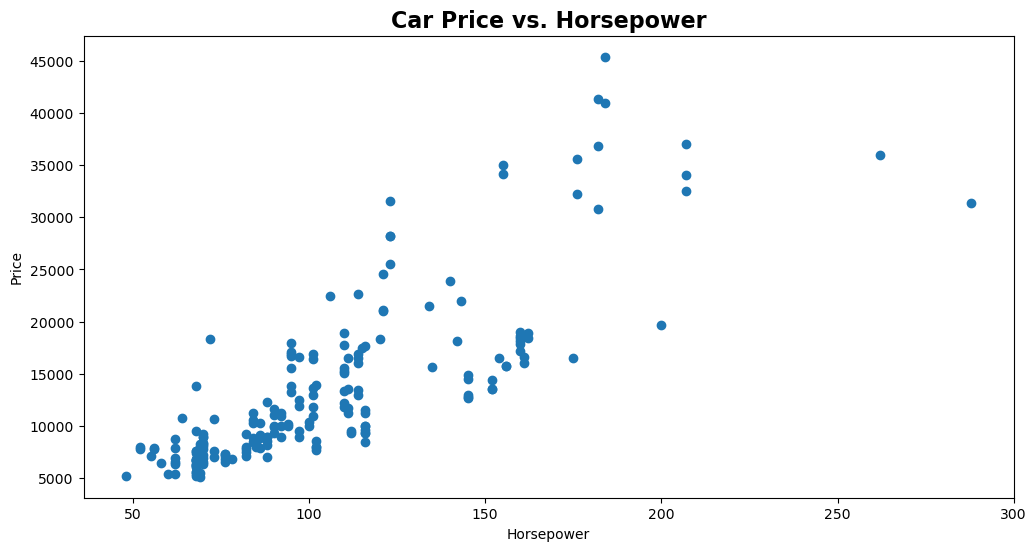

In [25]:
# Scatter plot of 'horsepower' vs. 'price'
plt.figure(figsize=(12, 6))
plt.scatter(data['horsepower'], data['price'])
plt.title('Car Price vs. Horsepower',size=16,fontweight="black")
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

#### Regression line plot

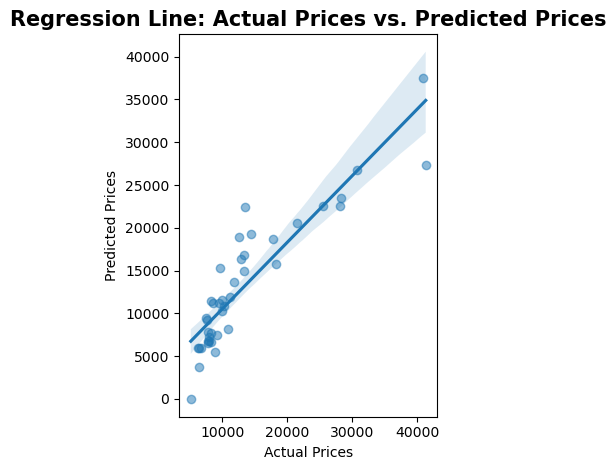

In [26]:
# Regression line plot
plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.title('Regression Line: Actual Prices vs. Predicted Prices',size=15,fontweight="black")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

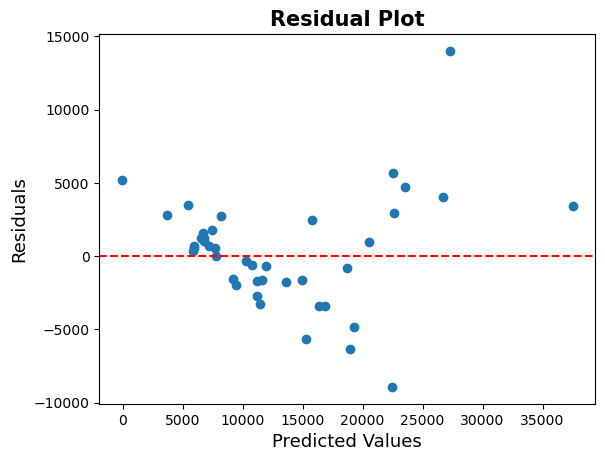

In [27]:
# Residual plot
plt.scatter(y_pred, y_test - y_pred)
plt.title("Residual Plot",size=15,fontweight="black")
plt.xlabel("Predicted Values",size=13)
plt.ylabel("Residuals",size=13)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

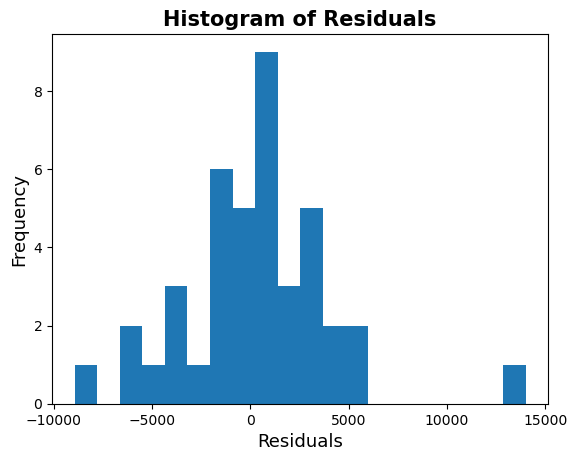

In [28]:
# Histogram of residuals
plt.hist(y_test - y_pred, bins=20)
plt.title("Histogram of Residuals",size=15,fontweight="black")
plt.xlabel("Residuals",size=13)
plt.ylabel("Frequency",size=13)
plt.show()

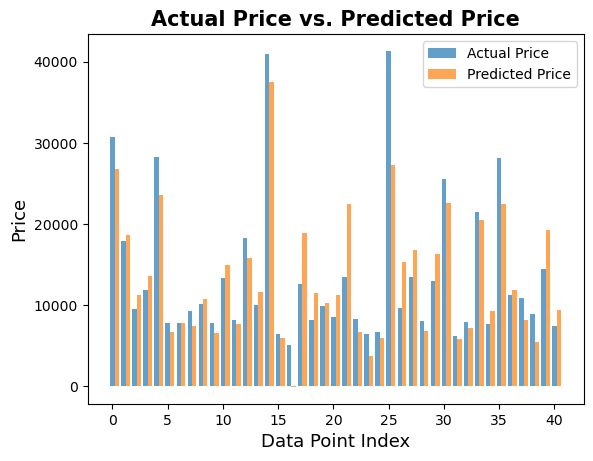

In [29]:
# Bar plot
actual_prices = y_test 
predicted_prices = y_pred  
indices = np.arange(len(actual_prices))
bar_width = 0.40

plt.bar(indices, actual_prices, bar_width, label='Actual Price', alpha=0.7)
plt.bar(indices + bar_width, predicted_prices, bar_width, label='Predicted Price', alpha=0.7)

plt.xlabel('Data Point Index',size=13)
plt.ylabel('Price',size=13)
plt.title('Actual Price vs. Predicted Price',size=15,fontweight="black")
plt.legend()
plt.show()
